# Data Science Intern at Prodigy Infotech

Author - D.Ramakrishna

Task-4 - 
Sentiment analysis for IMDb dataset

Language-Python

Software-Jupyter Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')  

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


False

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import numpy as np


In [3]:
data=pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
data.shape

(50000, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [9]:
# Calculate sentiment scores for each review
data['compound'] = data['review'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['compound_sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')


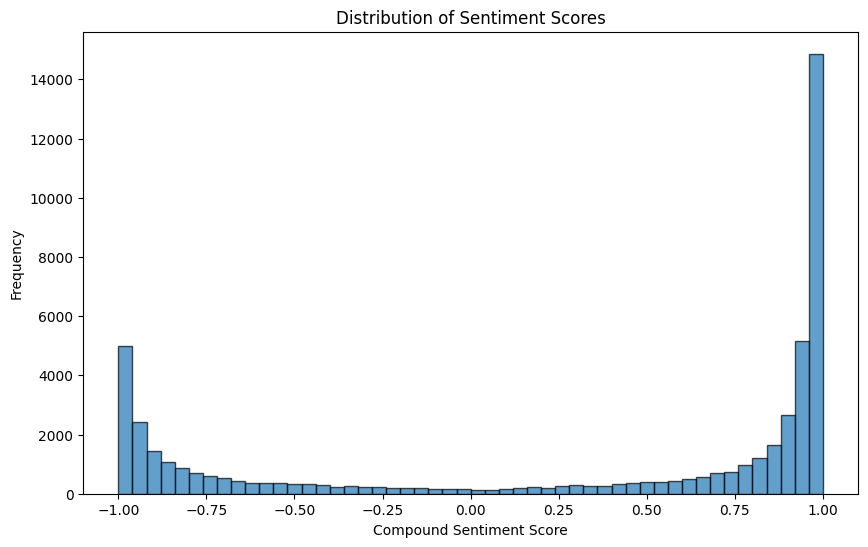

In [10]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
data['compound'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Create a WordCloud for positive reviews
positive_reviews = ' '.join(data[data['compound_sentiment'] == 'positive']['review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)


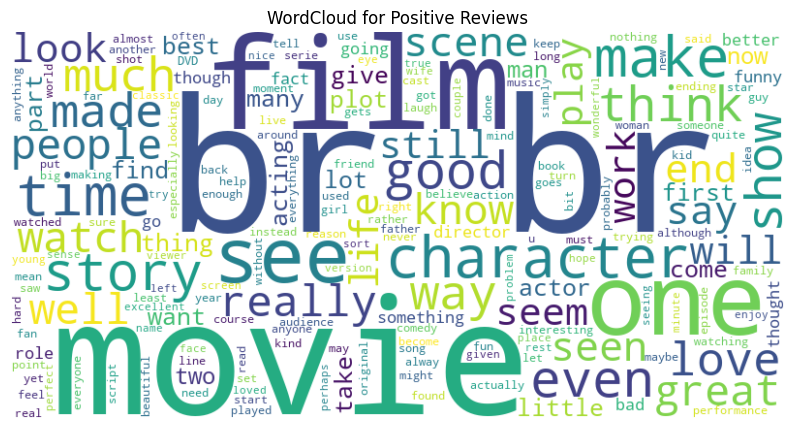

In [12]:
# Plot the WordCloud for positive reviews
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud for Positive Reviews')
plt.axis('off')
plt.show()


In [13]:
# Create a WordCloud for negative reviews
negative_reviews = ' '.join(data[data['compound_sentiment'] == 'negative']['review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)


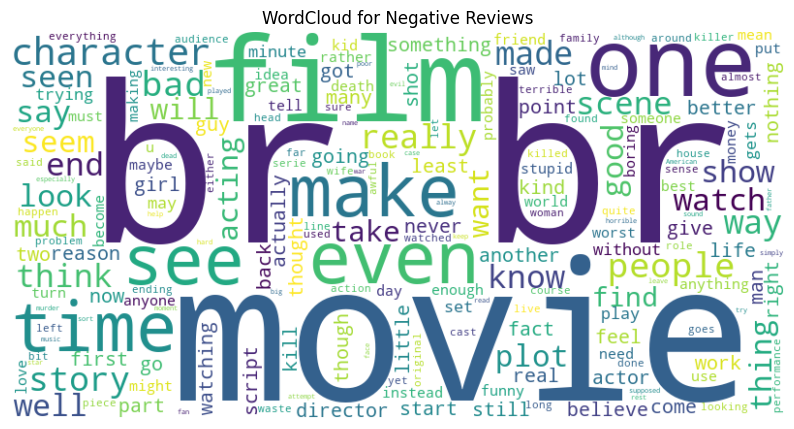

In [14]:
# Plot the WordCloud for negative reviews
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud for Negative Reviews')
plt.axis('off')
plt.show()

In [17]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


                                              review  Positive  Negative  \
0  One of the other reviewers has mentioned that ...     0.048     0.203   
1  A wonderful little production. <br /><br />The...     0.172     0.053   
2  I thought this was a wonderful way to spend ti...     0.192     0.094   
3  Basically there's a family where a little boy ...     0.065     0.138   
4  Petter Mattei's "Love in the Time of Money" is...     0.147     0.052   

   Neutral  
0    0.748  
1    0.776  
2    0.714  
3    0.797  
4    0.801  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  7036.779000000025
Negative:  4731.517999999977
Neutral:  38231.802
